In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

### Import data and look at first few rows 

In [2]:
file_path = '../data/national_data_master.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,FIPS,State,County,Deaths,Years of Potential Life Lost Rate,% Fair or Poor Health,Average Number of Physically Unhealthy Days,Average Number of Mentally Unhealthy Days,% Low Birthweight,% Adults Reporting Currently Smoking,...,% 65 and Over,% Black,% American Indian or Alaska Native,% Asian,% Native Hawaiian or Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural
0,1000,Alabama,NaN,98140.0,11415.734833,17.8,3.934735,5.869320,10.480008,17.9,...,18.026796,26.430898,0.715863,1.588693,0.109493,4.931778,64.711716,1.047498,51.375324,42.262760
1,1001,Alabama,Autauga,942.0,9407.948438,17.3,3.910265,5.703204,9.871335,16.9,...,16.410917,21.011061,0.471895,1.178065,0.122157,3.381917,72.051072,0.366486,51.296039,40.676813
2,1003,Alabama,Baldwin,3789.0,8981.575353,15.2,3.730943,5.373666,8.124318,15.0,...,21.928703,8.224887,0.810761,1.156086,0.066549,5.036216,82.978473,0.786658,51.239069,37.586455
3,1005,Alabama,Barbour,579.0,13138.848362,27.3,5.023488,6.014294,12.272491,25.0,...,20.622521,47.195013,0.724520,0.469522,0.279284,5.099976,45.272403,1.980660,47.122157,65.919994
4,1007,Alabama,Bibb,501.0,12675.434581,22.0,4.552795,5.824583,9.828571,22.0,...,17.805044,20.736196,0.572597,0.290843,0.131788,3.176551,73.996819,0.289182,46.489434,100.000000


In [4]:
data.shape

(3201, 88)

### Define target variable and features 

In [5]:
target = '% Adults with Diabetes'
#target = 'HIV Prevalence Rate'
#target = 'Drug Overdose Mortality Rate'

Check distribution of target variable

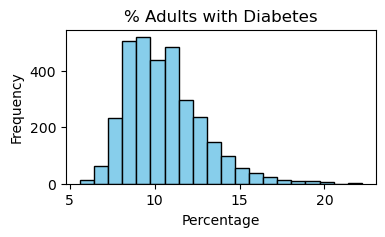

In [6]:
plt.figure(figsize=(4, 2))
plt.hist(data[target].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('% Adults with Diabetes')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.show()

In [7]:
# dem_features = ['% Completed High School', '% Some College', '% Unemployed', 'Income Ratio', '% Children in Single-Parent Households',
#                 '% Drive Alone to Work','% Long Commute - Drives Alone', 'Median Household Income', 'Traffic Volume', '% Homeowners', 
#                 '% Households with Severe Cost Burden', '% Households with Broadband Access', '% Less than 18 Years of Age', 
#                 '% 65 and Over', '% Black', '% American Indian or Alaska Native', '% Asian', '% Native Hawaiian or Other Pacific Islander',
#                 '% Hispanic', '% Non-Hispanic White', '% Not Proficient in English', '% Female', '% Rural']

In [8]:
#%run features.ipynb

In [9]:
features = ['Deaths', 'Years of Potential Life Lost Rate', '% Fair or Poor Health', 'Average Number of Physically Unhealthy Days', 
                'Average Number of Mentally Unhealthy Days', '% Low Birthweight', '% Adults Reporting Currently Smoking', 
                '% Adults with Obesity', 'Food Environment Index', '% Physically Inactive','% With Access to Exercise Opportunities',
                '% Excessive Drinking', '% Driving Deaths with Alcohol Involvement', 'Chlamydia Rate', 'Teen Birth Rate','% Uninsured', 
                'Primary Care Physicians Rate', 'Dentist Rate', 'Mental Health Provider Rate', 'Preventable Hospitalization Rate', 
                '% with Annual Mammogram','% Vaccinated', '% Completed High School', '% Some College', '% Unemployed', 
                '% Children in Poverty', 'Income Ratio', '% Children in Single-Parent Households', 'Social Association Rate',  
                'Injury Death Rate', 'Average Daily PM2.5', 'Presence of Water Violation', '% Severe Housing Problems', 
                '% Drive Alone to Work', '% Long Commute - Drives Alone','Life Expectancy', 'Age-Adjusted Death Rate','Child Mortality Rate',
                'Infant Mortality Rate','% Frequent Physical Distress', '% Frequent Mental Distress', '% Adults with Diabetes',  
                'HIV Prevalence Rate','% Food Insecure','% Limited Access to Healthy Foods', 'Drug Overdose Mortality Rate',
                '% Insufficient Sleep', '% Uninsured Adults',  '% Uninsured Children', 'Other Primary Care Provider Rate', 
                'High School Graduation Rate', '% Disconnected Youth','Average Grade Performance', 
                'Average Grade Performance.1', 'Segregation Index',  'School Funding Adequacy', 'Gender Pay Gap','Median Household Income',
                '% Enrolled in Free or Reduced Lunch', 'Segregation Index.1', '% Household Income Required for Child Care Expenses',
                'Child Care Centers per 1,000 Children', 'Homicide Rate', 'Suicide Rate (Age-Adjusted)', 'Firearm Fatalities Rate', 
                'Motor Vehicle Mortality Rate', 'Juvenile Arrest Rate','% Voter Turnout', '% Census Participation','Traffic Volume',
                '% Homeowners',  '% Households with Severe Cost Burden','% Households with Broadband Access','Population', 
                '% Less than 18 Years of Age', '% 65 and Over', '% Black', '% American Indian or Alaska Native','% Asian', 
                '% Native Hawaiian or Other Pacific Islander','% Hispanic', '% Non-Hispanic White','% Not Proficient in English',
                '% Female','% Rural']

In [10]:
np.size(features)

85

# Rows clean-up

### Find counties with the largest number of missing values

In [11]:
nan_counts = data.isna().sum(axis=1)
data['NaN_Count'] = nan_counts
sorted_data = data.sort_values(by='NaN_Count', ascending=False)
sorted_data[['State', 'County', 'NaN_Count']].head(10)

,State,County,NaN_Count
2970,Virginia,Bedford City,85
98,Alaska,Valdez-Cordova,85
96,Alaska,Skagway-Hoonah-Angoon,85
101,Alaska,Wrangell-Petersburg,85
99,Alaska,Wade Hampton,85
2466,South Dakota,Shannon,85
93,Alaska,Prince of Wales-Outer Ketchikan,85
566,Hawaii,Kalawao,45
74,Alaska,Chugach,35
75,Alaska,Copper River,34


### Drop counties with more than 35 NaN values

In [12]:
dropped_rows = data[data['NaN_Count'] <= 35]

### Drop rows with aggregate state data
These have NaN in the 'County' column. As expected, there are a total of 50 such rows, one per state.

In [13]:
data_reduced_rows = dropped_rows[dropped_rows['County'].notna()]

# Feautures clean-up

### Drop non-numeric features

In [14]:
#numeric_features = [i for i in features if pd.api.types.is_numeric_dtype(data[i])]
non_numeric_features = [i for i in features if not pd.api.types.is_numeric_dtype(data[i])]
non_numeric_features

['Presence of Water Violation']

### Drop features with more than 100 missing values

In [15]:
missing_values = data[features].isnull().sum()

# Filter columns with more than 100 missing values and sort them in descending order
missing_values_filtered = missing_values[missing_values > 100].sort_values(ascending=False) #100 is ~3% of the total number of rows

print("\nMissing Values per Column (More than 100):")
print(missing_values_filtered)


Missing Values per Column (More than 100):
% Disconnected Youth                     1977
Infant Mortality Rate                    1944
Homicide Rate                            1774
Juvenile Arrest Rate                     1255
Drug Overdose Mortality Rate             1251
Child Mortality Rate                     1112
Segregation Index.1                      1074
Firearm Fatalities Rate                   871
Suicide Rate (Age-Adjusted)               723
High School Graduation Rate               685
% Enrolled in Free or Reduced Lunch       559
Average Grade Performance.1               463
Motor Vehicle Mortality Rate              462
HIV Prevalence Rate                       462
Average Grade Performance                 376
Deaths                                    264
Years of Potential Life Lost Rate         264
Segregation Index                         228
Teen Birth Rate                           223
Mental Health Provider Rate               192
Primary Care Physicians Rate        

In [16]:
features_to_drop = missing_values_filtered.index.tolist()
filtered_features = [i for i in features if i not in features_to_drop and i not in non_numeric_features]
np.size(filtered_features)

59

### Find correlation between target variable and selected features
Here we use the data set we got after getting rid of extra rows/NaN rows

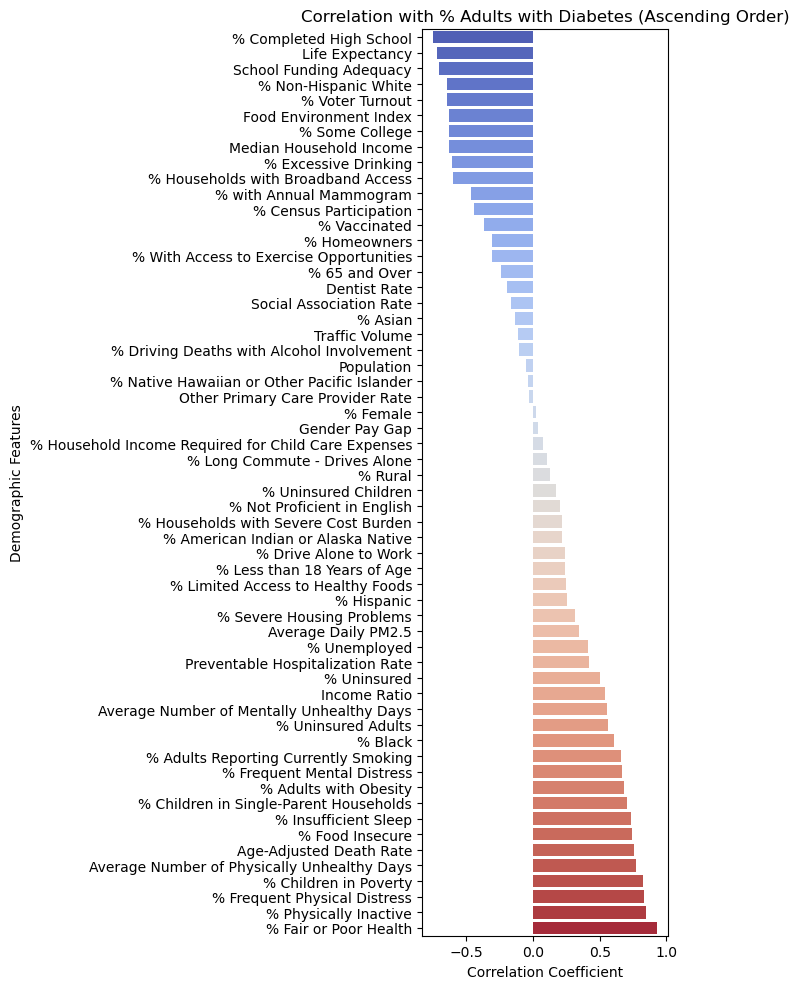

In [17]:
# Calculate the correlation matrix
correlation_matrix = data_reduced_rows[filtered_features + [target]].corr()
target_correlation = correlation_matrix[target].drop(target)

# Turn DataFrame into Series
if isinstance(target_correlation, pd.DataFrame):
    target_correlation = target_correlation.iloc[:, 0]  # Take the first column

sorted_correlations = target_correlation.sort_values()

# Make barplot
plt.figure(figsize=(7, 10))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette='coolwarm', hue=target_correlation.index,legend=False)

plt.title('Correlation with ' + target + ' (Ascending Order)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Demographic Features')

plt.tight_layout()
plt.show()



In [18]:
# # Look at race/etnicity-features only
# race_features = [ '% Black','% American Indian or Alaska Native','% Asian','% Native Hawaiian or Other Pacific Islander','% Hispanic',
#                  '% Non-Hispanic White']

# correlation_matrix = data[race_features + [target]].corr()
# target_correlation_race = correlation_matrix[target].drop(target)
# sorted_correlations_race = target_correlation_race.sort_values()

# plt.figure(figsize=(7, 4))
# sns.barplot(x=sorted_correlations_race.values, y=sorted_correlations_race.index, palette='coolwarm', hue=target_correlation_race.index,legend=False)

# plt.title('Correlation with ' + target + '(Race Features Only)')
# plt.xlabel('Correlation Coefficient')
# plt.ylabel('Race Demographic Features')

# plt.tight_layout()
# plt.show()


### Keep features with correlation > |0.3|

In [19]:
features_high_corr = sorted_correlations[(sorted_correlations < -0.3) | (sorted_correlations > 0.3)].index.tolist()
np.size(features_high_corr)

36

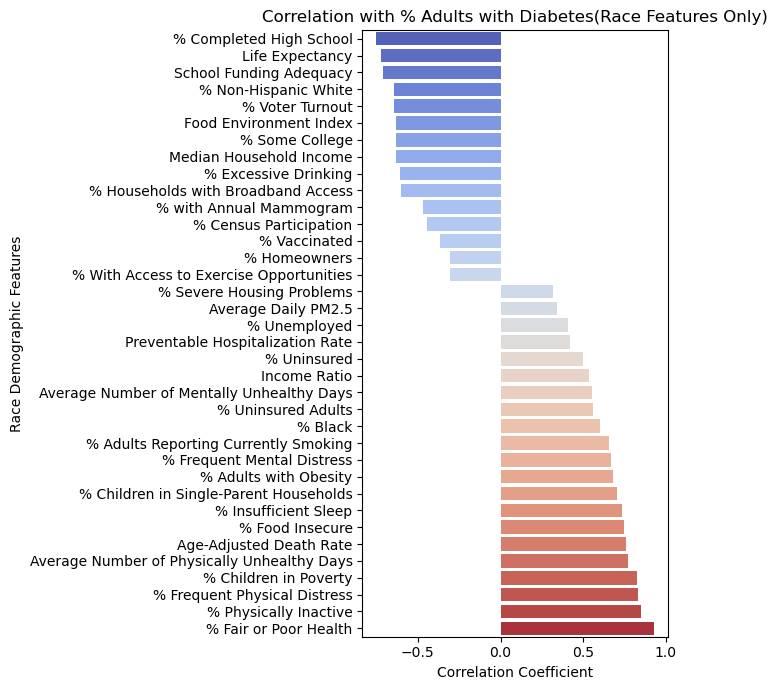

In [20]:
correlation_matrix = data_reduced_rows[features_high_corr  + [target]].corr()
target_correlation_race = correlation_matrix[target].drop(target)
sorted_correlations_race = target_correlation_race.sort_values()

plt.figure(figsize=(7, 7))
sns.barplot(x=sorted_correlations_race.values, y=sorted_correlations_race.index, palette='coolwarm', hue=target_correlation_race.index,legend=False)

plt.title('Correlation with ' + target + '(Race Features Only)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Race Demographic Features')

plt.tight_layout()
plt.show()

### Drop features that are redundant or obviously correlated

In [21]:
red_features = ['Life Expectancy',
            'Years of Potential Life Lost Rate',
            'Age-Adjusted Death Rate',
            'Injury Death Rate',   
            '% Fair or Poor Health',
            'Preventable Hospitalization Rate',
            '% Uninsured Adults', #There is already % uninsured 
            'Average Number of Mentally Unhealthy Days', #similar to %frequent mental distress
            'Average Number of Physically Unhealthy Days', #similar to %frequent physical distress
            '% Some College' #already have % completed high school
               ]         

In [22]:
features_to_keep = [i for i in features_high_corr if i not in red_features]
np.size(features_to_keep)

28

### Look at correlation between remaining features to potentially drop other features that are highly correlated with each other?

In [23]:
# # Correlation matrix
# correlation_matrix = data_reduced_rows[features_to_keep + [target]].corr()

# plt.figure(figsize=(20, 20))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
# plt.title('Correlation Matrix of Features')
# plt.show()

## Create data set that excludes dropped rows and dropped features

In [24]:
data_dropped_both = data_reduced_rows[['FIPS', 'State', 'County', target] + features_to_keep ]
print(np.shape(data_dropped_both)) #We are left with 3142 counties and 32 features
data_dropped_both.head(10)

(3142, 32)


,FIPS,State,County,% Adults with Diabetes,% Completed High School,School Funding Adequacy,% Non-Hispanic White,% Voter Turnout,Food Environment Index,Median Household Income,...,% Black,% Adults Reporting Currently Smoking,% Frequent Mental Distress,% Adults with Obesity,% Children in Single-Parent Households,% Insufficient Sleep,% Food Insecure,% Children in Poverty,% Frequent Physical Distress,% Physically Inactive
1,1001,Alabama,Autauga,10.7,90.402608,-3606.7820,72.051072,66.182078,6.7,70148.0,...,21.011061,16.9,18.0,38.9,22.702506,37.5,13.3,15.7,11.7,29.1
2,1003,Alabama,Baldwin,9.8,91.599310,-537.1533,82.978473,65.290949,7.5,71704.0,...,8.224887,15.0,17.3,37.2,19.051287,35.1,11.8,16.1,11.0,27.6
3,1005,Alabama,Barbour,15.6,76.492221,-23626.5800,45.272403,54.021572,6.0,41151.0,...,47.195013,25.0,20.5,43.4,50.660451,43.9,17.8,37.7,15.8,40.2
4,1007,Alabama,Bibb,12.4,78.863422,-6970.6460,73.996819,54.563548,7.6,54309.0,...,20.736196,22.0,19.4,39.6,30.713370,40.0,14.9,25.5,14.0,36.0
5,1009,Alabama,Blount,10.5,81.755151,-2788.9990,85.992741,64.187994,7.7,60553.0,...,1.727383,19.6,18.8,37.7,22.969477,37.3,13.7,15.8,12.8,30.4
6,1011,Alabama,Bullock,18.7,73.378983,-38452.9800,21.750637,59.065301,4.2,35798.0,...,67.339737,25.7,20.5,48.9,63.046480,46.0,15.6,39.0,16.6,43.6
7,1013,Alabama,Butler,14.0,87.592341,-15080.5100,50.766756,62.917772,7.2,41852.0,...,44.187668,21.1,19.9,42.0,39.277279,40.9,13.8,33.0,14.1,36.5
8,1015,Alabama,Calhoun,12.0,85.071772,-10277.2302,70.200712,57.856332,5.9,52772.0,...,22.026462,20.8,19.1,38.9,32.719158,38.1,15.6,26.2,13.5,34.1
9,1017,Alabama,Chambers,13.4,83.457460,-26351.2350,54.450246,58.525751,7.2,45563.0,...,39.274818,20.3,19.5,43.9,25.327207,43.4,13.3,30.6,13.7,35.0
10,1019,Alabama,Cherokee,11.1,81.925174,-1664.0260,91.036282,59.511369,7.2,52613.0,...,3.987827,22.2,20.1,37.8,29.291640,38.2,14.7,22.7,13.8,32.8


In [25]:
#Neal put this here to get an output file for playing with imputation
data_dropped_both.to_csv('../data/data_pre-imputing.csv', index=False)

#### Check how many NaN values are now left in each county

In [25]:
new_nan_counts_rows = data_dropped_both.isna().sum(axis=1)
data['NaN_Count'] = new_nan_counts_rows
sorted_data = data.sort_values(by='NaN_Count', ascending=False)
sorted_data[['State', 'County', 'NaN_Count']].head(20)

,State,County,NaN_Count
75,Alaska,Copper River,8.0
74,Alaska,Chugach,8.0
86,Alaska,Lake and Peninsula,6.0
102,Alaska,Yakutat,5.0
100,Alaska,Wrangell,4.0
92,Alaska,Prince of Wales-Hyder,4.0
91,Alaska,Petersburg,4.0
90,Alaska,Northwest Arctic,4.0
89,Alaska,North Slope,4.0
85,Alaska,Kusilvak,4.0


#### Check how many NaN values are now left for each feature

In [26]:
new_nan_counts_features = data_dropped_both[features_to_keep].isna().sum()

missing_values_features = new_nan_counts_features[new_nan_counts_features > 0].sort_values(ascending=False)

print(missing_values_features)

School Funding Adequacy                    83
% With Access to Exercise Opportunities    45
Food Environment Index                     34
% Voter Turnout                            30
Average Daily PM2.5                        27
% with Annual Mammogram                    21
% Vaccinated                               19
Income Ratio                               15
% Census Participation                      3
% Insufficient Sleep                        3
dtype: int64


## Impute to fill in missing values

In [27]:
def impute_with_mean(df):
    for column in df.columns:
        if column not in ['State', 'County', 'FIPS']:  # Skip the 'State' and 'County' columns
            # Calculate the mean of the column grouped by 'State'
            mean_values = df.groupby('State')[column].transform('mean')
            # Use .loc to fill NaN values in the current column with the grouped mean values
            df.loc[df[column].isna(), column] = mean_values[df[column].isna()]
    return df

# Impute missing values
data_dropped_imputed = impute_with_mean(data_dropped_both)

In [28]:
data_dropped_imputed

,FIPS,State,County,% Adults with Diabetes,% Completed High School,School Funding Adequacy,% Non-Hispanic White,% Voter Turnout,Food Environment Index,Median Household Income,...,% Black,% Adults Reporting Currently Smoking,% Frequent Mental Distress,% Adults with Obesity,% Children in Single-Parent Households,% Insufficient Sleep,% Food Insecure,% Children in Poverty,% Frequent Physical Distress,% Physically Inactive
1,1001,Alabama,Autauga,10.7,90.402608,-3606.782000,72.051072,66.182078,6.7,70148.0,...,21.011061,16.9,18.0,38.9,22.702506,37.5,13.3,15.7,11.7,29.1
2,1003,Alabama,Baldwin,9.8,91.599310,-537.153300,82.978473,65.290949,7.5,71704.0,...,8.224887,15.0,17.3,37.2,19.051287,35.1,11.8,16.1,11.0,27.6
3,1005,Alabama,Barbour,15.6,76.492221,-23626.580000,45.272403,54.021572,6.0,41151.0,...,47.195013,25.0,20.5,43.4,50.660451,43.9,17.8,37.7,15.8,40.2
4,1007,Alabama,Bibb,12.4,78.863422,-6970.646000,73.996819,54.563548,7.6,54309.0,...,20.736196,22.0,19.4,39.6,30.713370,40.0,14.9,25.5,14.0,36.0
5,1009,Alabama,Blount,10.5,81.755151,-2788.999000,85.992741,64.187994,7.7,60553.0,...,1.727383,19.6,18.8,37.7,22.969477,37.3,13.7,15.8,12.8,30.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,56037,Wyoming,Sweetwater,8.8,93.045590,8290.259500,78.839037,54.435208,7.9,75779.0,...,1.064216,17.8,16.1,34.3,15.526095,30.4,11.4,14.9,10.7,25.7
3197,56039,Wyoming,Teton,6.6,95.965982,12415.670000,79.855713,86.196444,8.7,127677.0,...,0.712844,11.1,12.7,21.7,15.761267,26.5,8.4,5.3,8.0,16.1
3198,56041,Wyoming,Uinta,8.3,94.364924,7543.786333,86.597142,67.037562,8.5,73072.0,...,0.511781,16.8,15.7,33.3,10.143910,35.3,10.3,13.2,10.6,22.8
3199,56043,Wyoming,Washakie,8.4,94.711103,12802.576000,82.134992,67.481172,8.6,60699.0,...,0.427517,16.4,15.3,33.6,9.356015,31.2,9.3,14.3,10.4,22.9


#### Check that there are no NaN values left

In [29]:
total_nan = data_dropped_imputed.isna().sum().sum()

print(f'Total number of NaN values in the DataFrame: {total_nan}')

Total number of NaN values in the DataFrame: 48


#### Check where there are still some NaN values

In [30]:
columns_with_nan = data_dropped_imputed.columns[data_dropped_imputed.isna().any()].tolist()

# Print the corresponding rows with NaN values
nan_rows = data_dropped_imputed[data_dropped_imputed[columns_with_nan].isna().any(axis=1)]

# Select only the relevant columns to display
nan_rows_filtered = nan_rows[['State', 'County'] + columns_with_nan]

print("Rows with NaN values in the following columns:")
print(nan_rows_filtered)

print("Columns with NaN values:", columns_with_nan)

Rows with NaN values in the following columns:
        State                 County  School Funding Adequacy  % Voter Turnout
69     Alaska         Aleutians East             26955.540000              NaN
70     Alaska         Aleutians West             11035.230000              NaN
71     Alaska              Anchorage              2907.980500              NaN
72     Alaska                 Bethel             -4229.031667              NaN
73     Alaska            Bristol Bay             32379.685000              NaN
74     Alaska                Chugach             12610.698701              NaN
75     Alaska           Copper River             12610.698701              NaN
76     Alaska                 Denali              1498.964000              NaN
77     Alaska             Dillingham             19324.095000              NaN
78     Alaska   Fairbanks North Star              2459.281500              NaN
79     Alaska                 Haines              5020.291000              NaN
80   

#### Drop features that still have NaN values (school funding adequacy and % voter turn out in this case. The alternative would be to drop the counties with left-over NaN values (pretty much all of Alaska, Vermont, and Hawaii) or we could find a different way to impute

In [31]:
data_final = data_dropped_imputed.drop(columns=columns_with_nan)
np.shape(data_final)

(3142, 30)

In [32]:
total_nan_final = data_final.isna().sum().sum()
total_nan_final

np.int64(0)

In [34]:
data_final.to_csv('data_final.csv', index=False)